## Importing the necessary libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading the dataset

In [109]:
df = pd.read_csv('bank-full.csv',delimiter=';')

In [110]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [111]:
df.rename(columns={'y':'subscribed_deposit'}, inplace=True)

## Details about the dataset

In [113]:
df.shape

(45211, 17)

In [114]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed_deposit'],
      dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 45211 non-null  int64 
 1   job                 45211 non-null  object
 2   marital             45211 non-null  object
 3   education           45211 non-null  object
 4   default             45211 non-null  object
 5   balance             45211 non-null  int64 
 6   housing             45211 non-null  object
 7   loan                45211 non-null  object
 8   contact             45211 non-null  object
 9   day                 45211 non-null  int64 
 10  month               45211 non-null  object
 11  duration            45211 non-null  int64 
 12  campaign            45211 non-null  int64 
 13  pdays               45211 non-null  int64 
 14  previous            45211 non-null  int64 
 15  poutcome            45211 non-null  object
 16  subscribed_deposit  45

In [116]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Checking for null/missing values in the dataset

In [118]:
df.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
balance               0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
subscribed_deposit    0
dtype: int64

Observation & Inference:

No missing values present

## Checking for duplicate values in the dataset

In [121]:
df.duplicated().sum()

0

In [122]:
df.drop_duplicates(inplace=True)

In [123]:
df.duplicated().sum()

0

Observation & Inference:

All the duplicate values are removed

## Visualizing numerical columns using histogram

In [126]:
df_obj= df.select_dtypes(include='object').columns

df_num= df.select_dtypes(exclude='object').columns

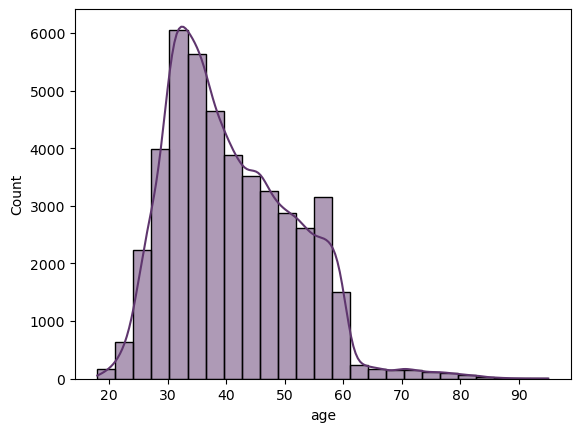

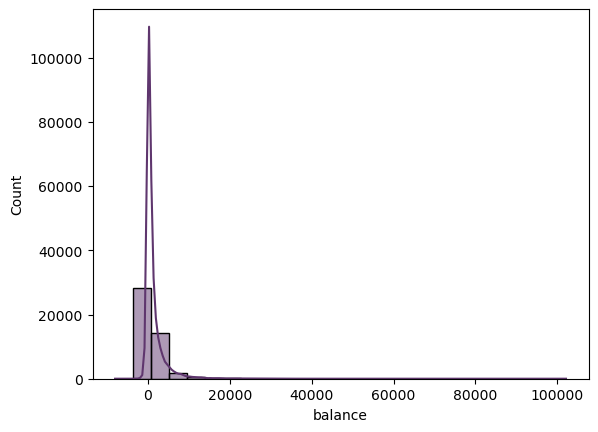

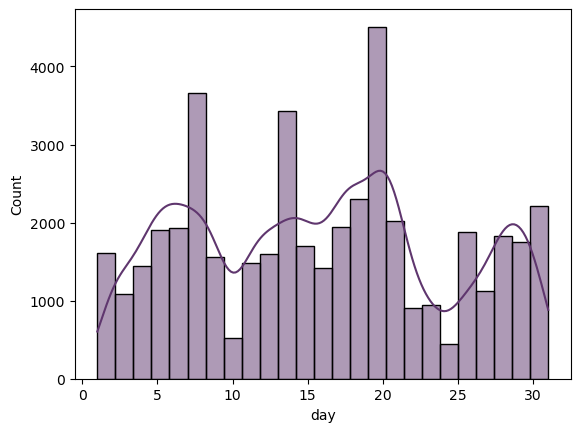

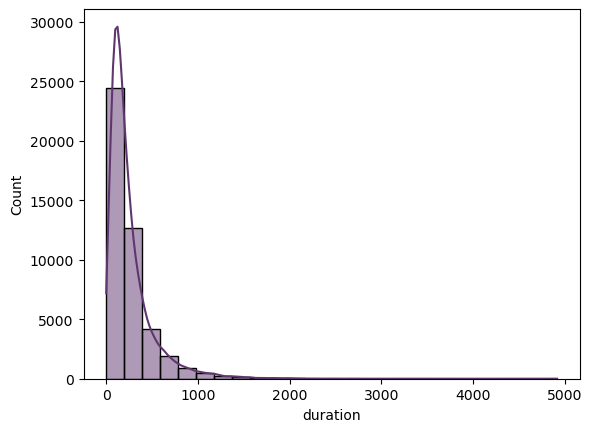

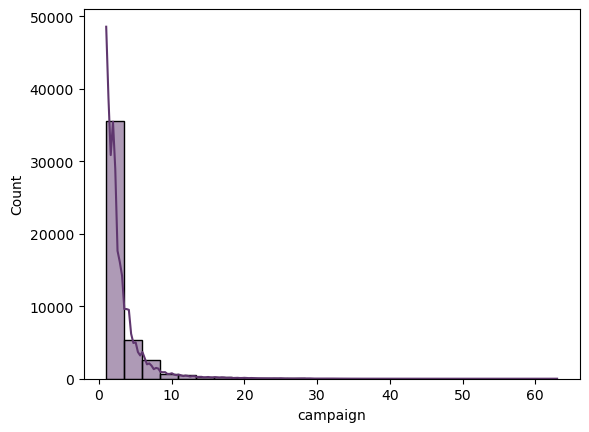

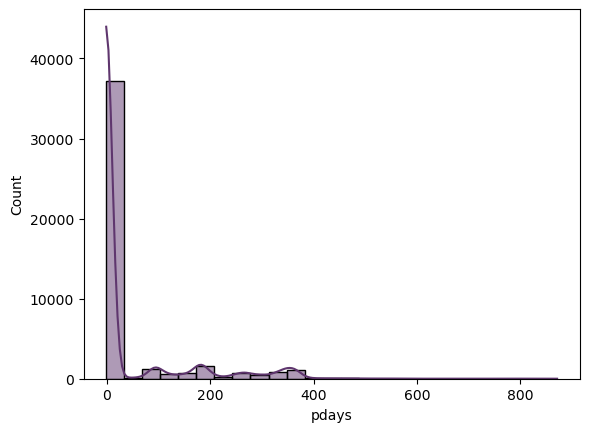

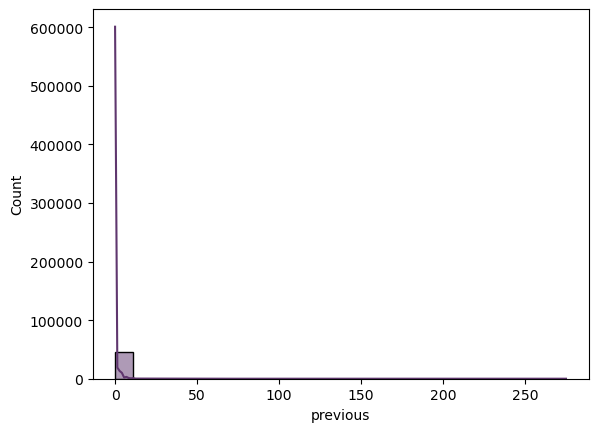

In [127]:
for feature in df_num:
    sns.histplot(x=feature,data=df,bins=25,kde=True,color='#5f366e')
    plt.show()

## Visualizing categorical columns using bar graphs

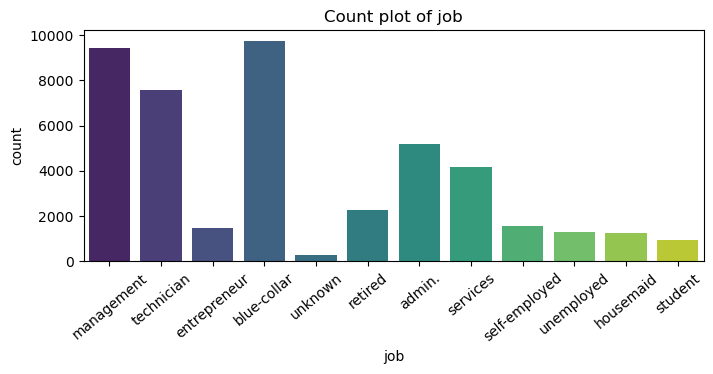

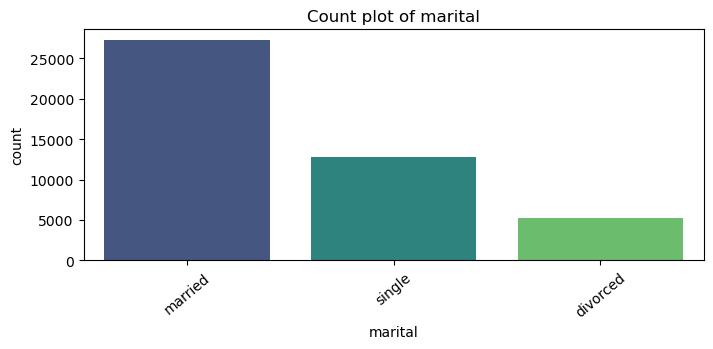

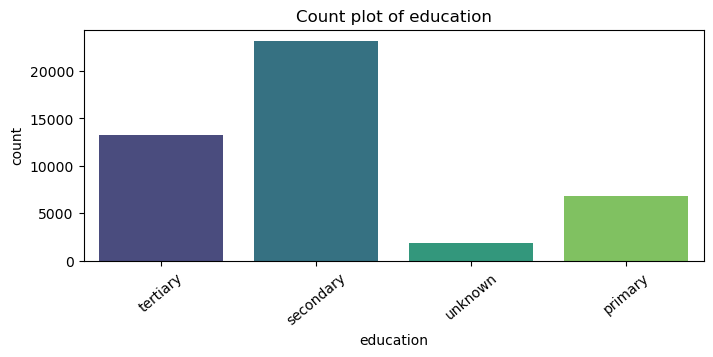

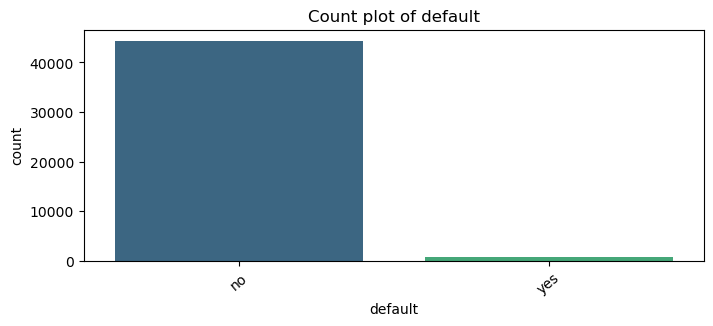

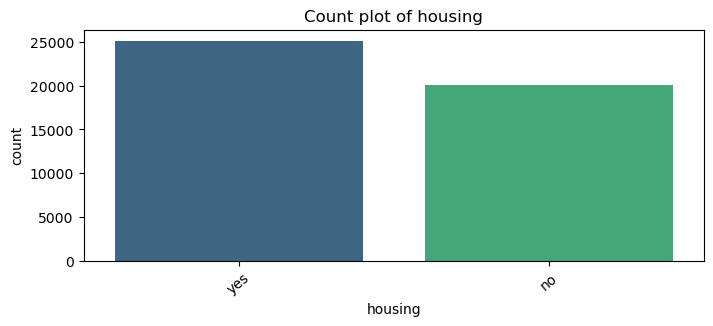

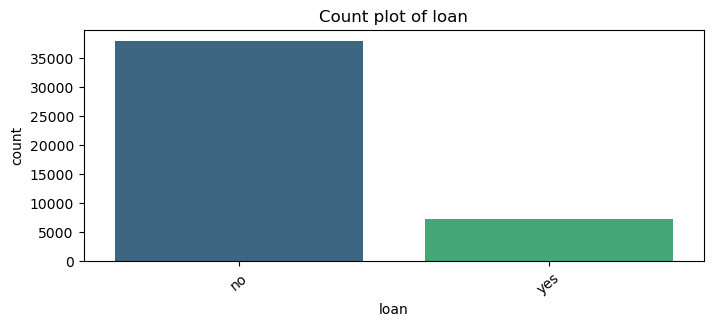

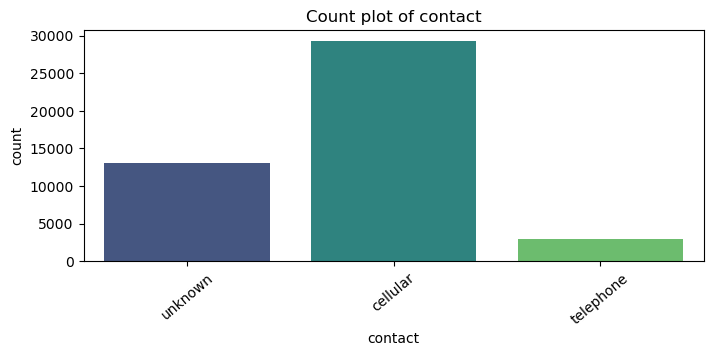

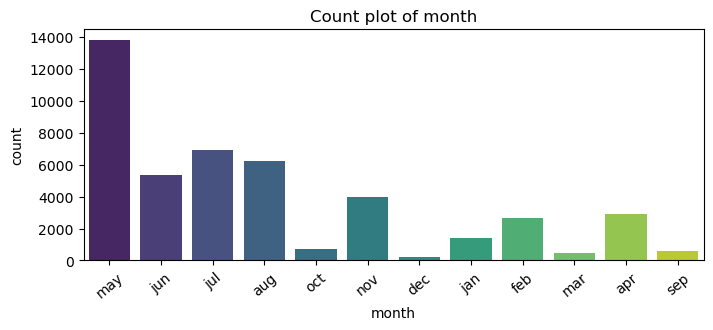

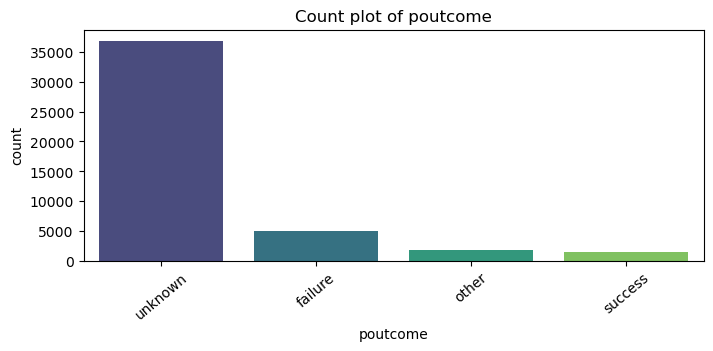

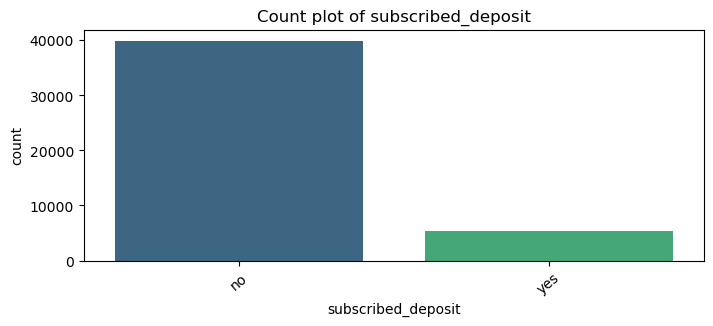

In [129]:
for feature in df_obj:
    plt.figure(figsize=(8,3))
    plt.title(f"Count plot of {feature}")
    sns.countplot(x=feature,data=df,palette='viridis')
    plt.xticks(rotation=40)
    plt.show()

Observations & Insights:

In the Job Column, we have seen most of the clients are working as 'admin'.

In the marital Column, we have seen most of the clients are married.

In the education Column, we have seen most of the clients are having 'university.degree' as education.

In the default Column, we have seen most of the clients are having 'no' credit as default.

In the housing Column, we have seen most of the clients are taking housing loan.

In the loan Column, we have seen most of the clients are not taking personal loan.

In the contact Column, we have seen most of the clients are choosen cellular as contact.

In the month Column, we have seen most of the clients are contacted in the 'may' month.

In the day_of_week Column, we have seen most of the clients are contacted in 'thursday'.

In the poutcome Column, we have seen the result of most of the previous market campaign is 'nonexistent'.

In the target column , we have seen most of the clients are not subscribed a term deposit.

## checking for outliers

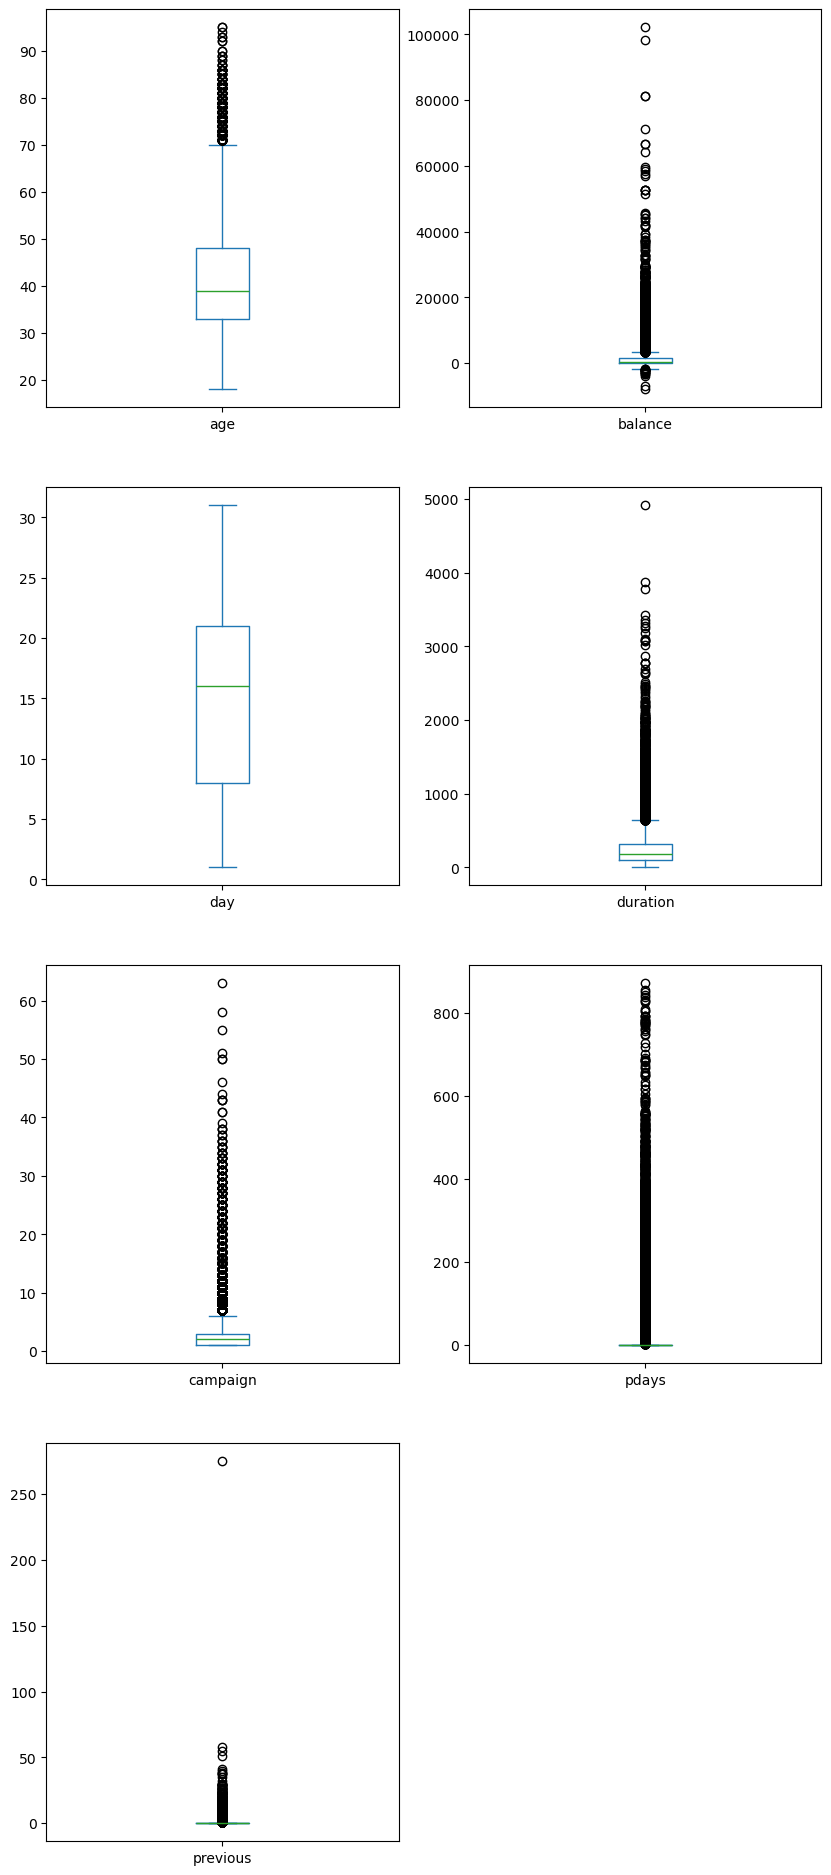

In [132]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

## Outlier treatment

In [134]:
columns = ['age', 'campaign', 'duration']

for column in columns:
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Filter the DataFrame for the current column
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

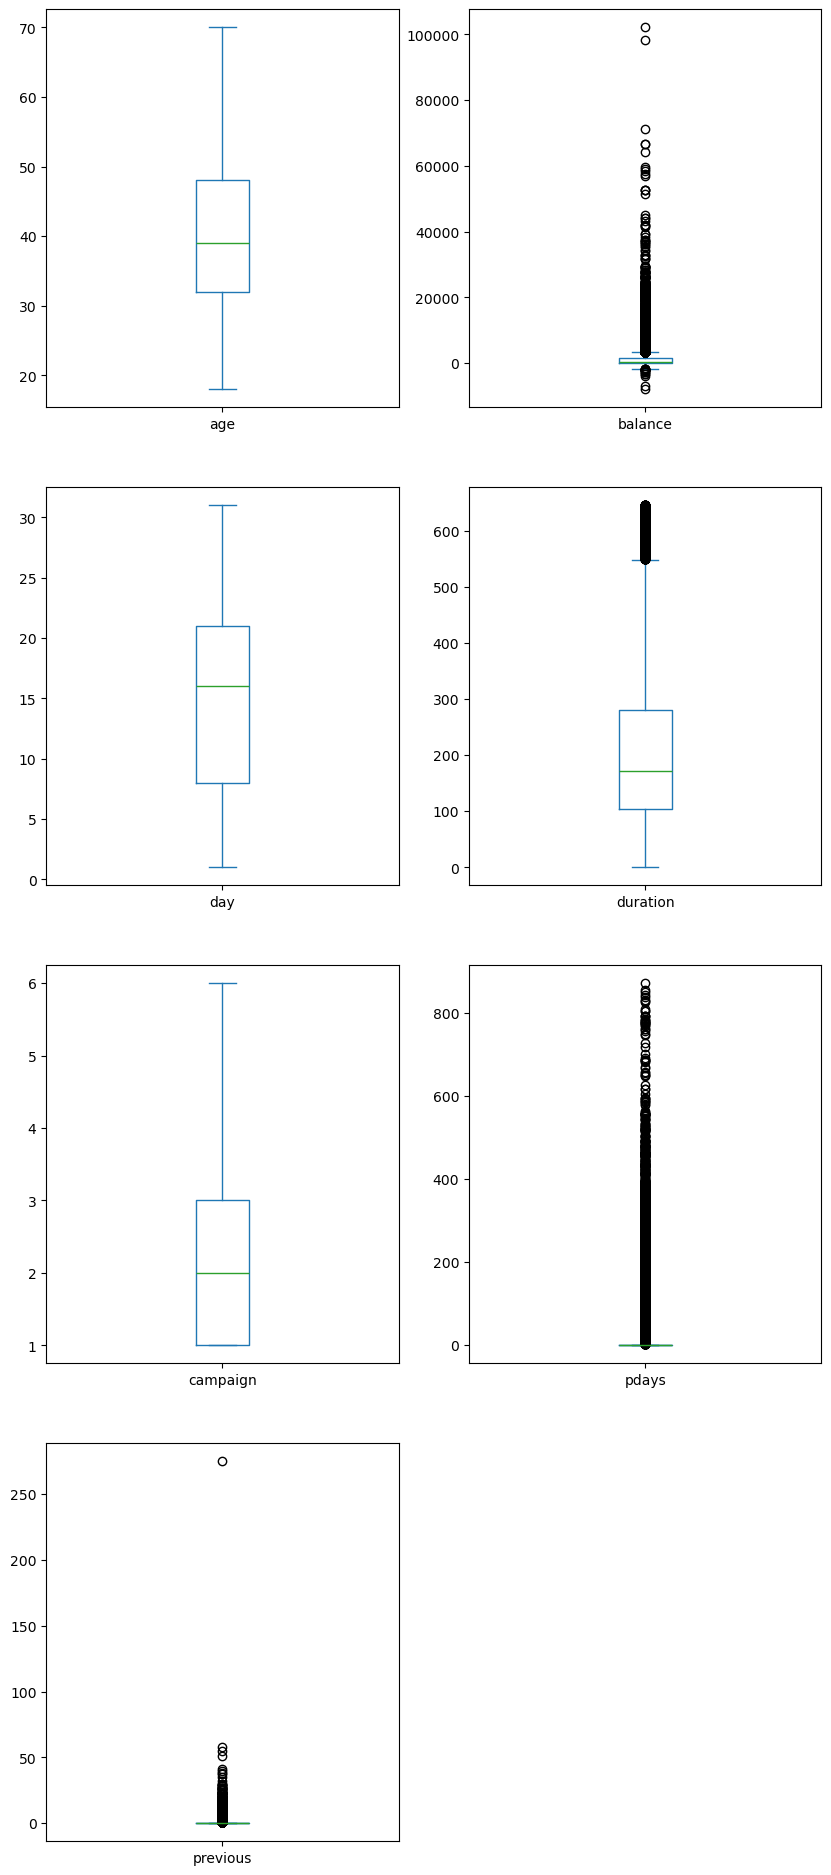

In [135]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

## Checking for correlation using heatmap

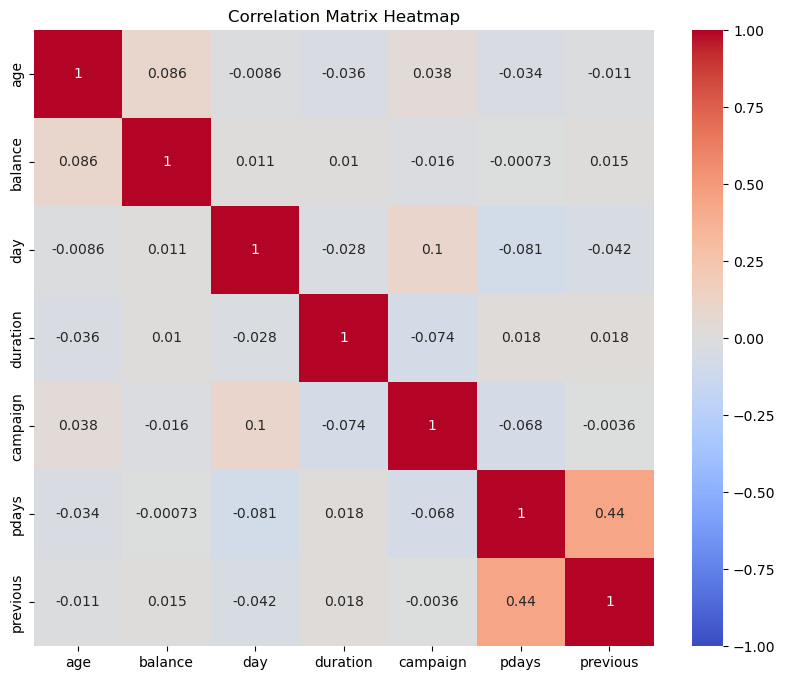

In [137]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## showing dimensions of the updated dataset

In [139]:
df1.shape

(38690, 17)

## Conversion of categorical columns into numerical columns using label encoder

In [141]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df1.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed_deposit
0,40,4,1,2,0,2977,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,899,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,872,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2371,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,871,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,16,0,2,1,0,1427,0,0,0,16,9,224,0,0,0,3,1
45203,5,8,2,2,0,983,0,0,0,16,9,266,0,0,0,3,1
45205,7,9,2,1,0,1375,0,1,0,16,9,386,1,0,0,3,1
45209,39,1,1,1,0,1538,0,0,1,16,9,508,3,0,0,3,0


## Checking the target variable

In [143]:
df_encoded['subscribed_deposit'].value_counts(normalize=True)*100

subscribed_deposit
0    91.240631
1     8.759369
Name: proportion, dtype: float64

In [144]:
## independent variables
x = df_encoded.iloc[:,:-1]   

## Target variable
y = df_encoded.iloc[:,-1] 

In [145]:
x.shape

(38690, 16)

In [146]:
y.shape

(38690,)

## Splitting the dataset into train and test datasets

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27083, 16)
(11607, 16)
(27083,)
(11607,)


## Decision Tree classifier
### using 'gini' criterion

In [150]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

## Evaluating Training and Testing Accuracy

In [152]:
print("Training accuracy:",dc.score(x_train,y_train))
print("Testing accuracy:",dc.score(x_test,y_test))

Training accuracy: 0.925931396078721
Testing accuracy: 0.9290945119324545


In [153]:
y_pred=dc.predict(x_test)

## Evaluating Prediction Accuracy

In [155]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9290945119324545


In [156]:
print(confusion_matrix(y_test,y_pred))

[[10469   118]
 [  705   315]]


In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10587
           1       0.73      0.31      0.43      1020

    accuracy                           0.93     11607
   macro avg       0.83      0.65      0.70     11607
weighted avg       0.92      0.93      0.92     11607



## Plot Decision Tree

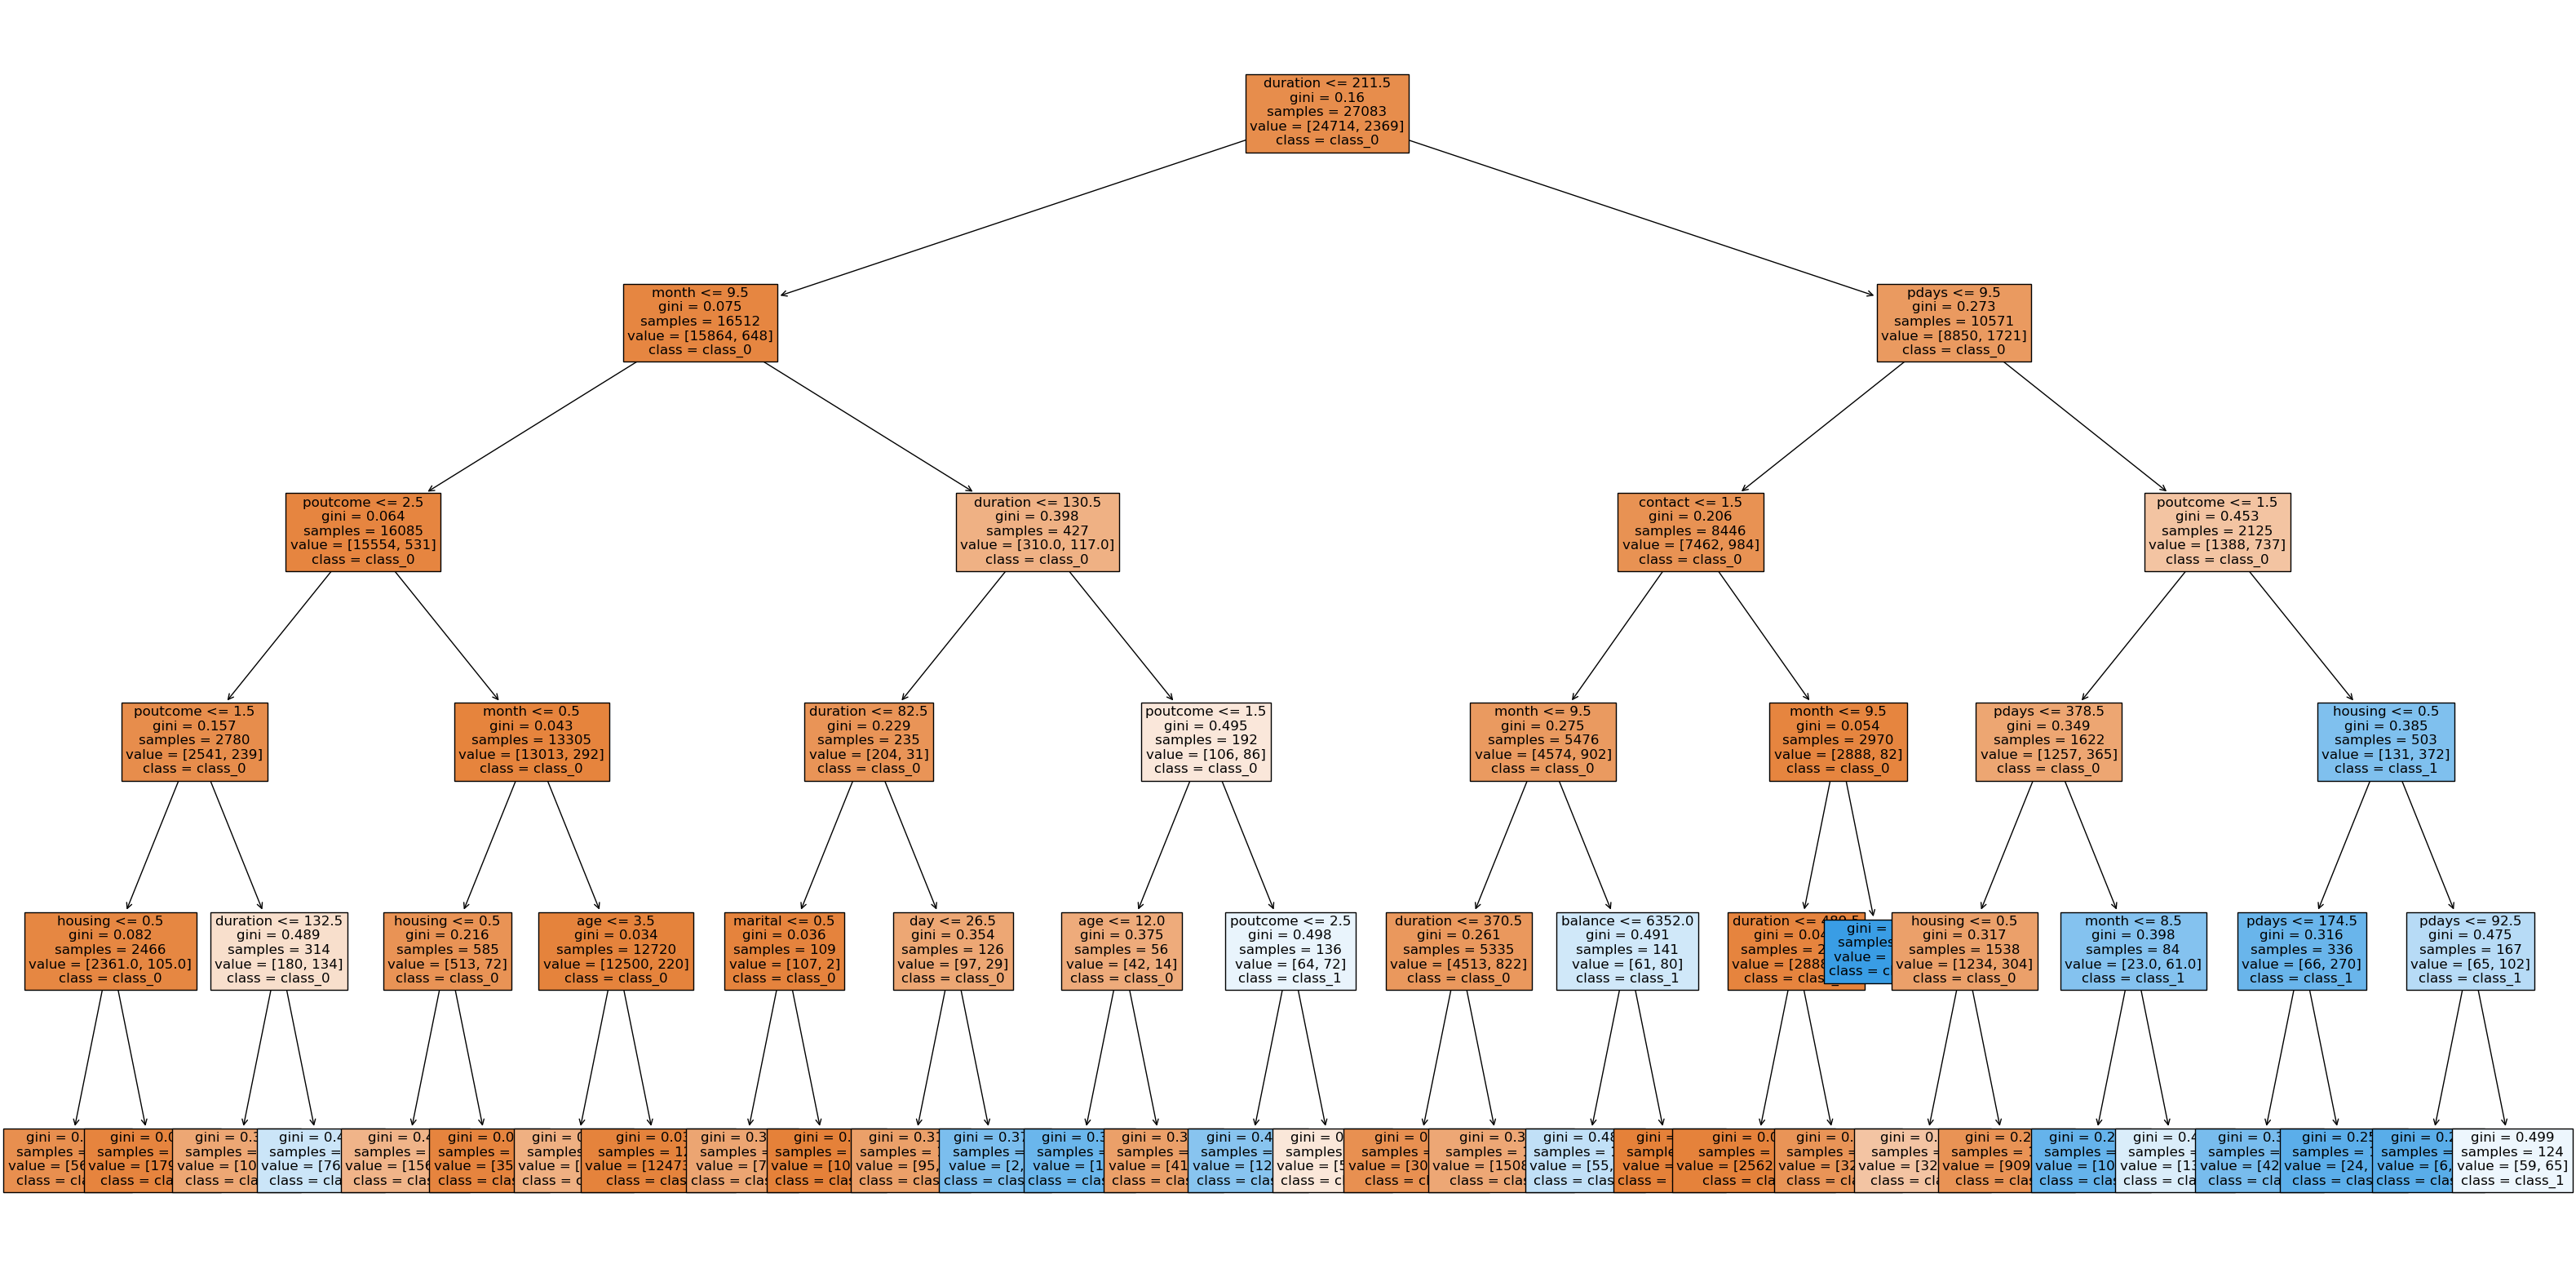

In [159]:
from sklearn.tree import plot_tree
feature_names=df.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()

## Decision Tree classifier
### using 'entropy' criterion

In [161]:
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

## Evaluating Training and Testing Accuracy

In [163]:
print("Training accuracy:",dc1.score(x_train,y_train))
print("Testing accuracy:",dc1.score(x_test,y_test))

Training accuracy: 0.9176236015212494
Testing accuracy: 0.9178943740846042


## Evaluating Prediction Accuracy

In [165]:
y1_pred=dc1.predict(x_test)
print(accuracy_score(y_test,y1_pred))

0.9178943740846042


In [166]:
print(confusion_matrix(y_test,y1_pred))

[[10364   223]
 [  730   290]]


In [167]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     10587
           1       0.57      0.28      0.38      1020

    accuracy                           0.92     11607
   macro avg       0.75      0.63      0.67     11607
weighted avg       0.90      0.92      0.91     11607



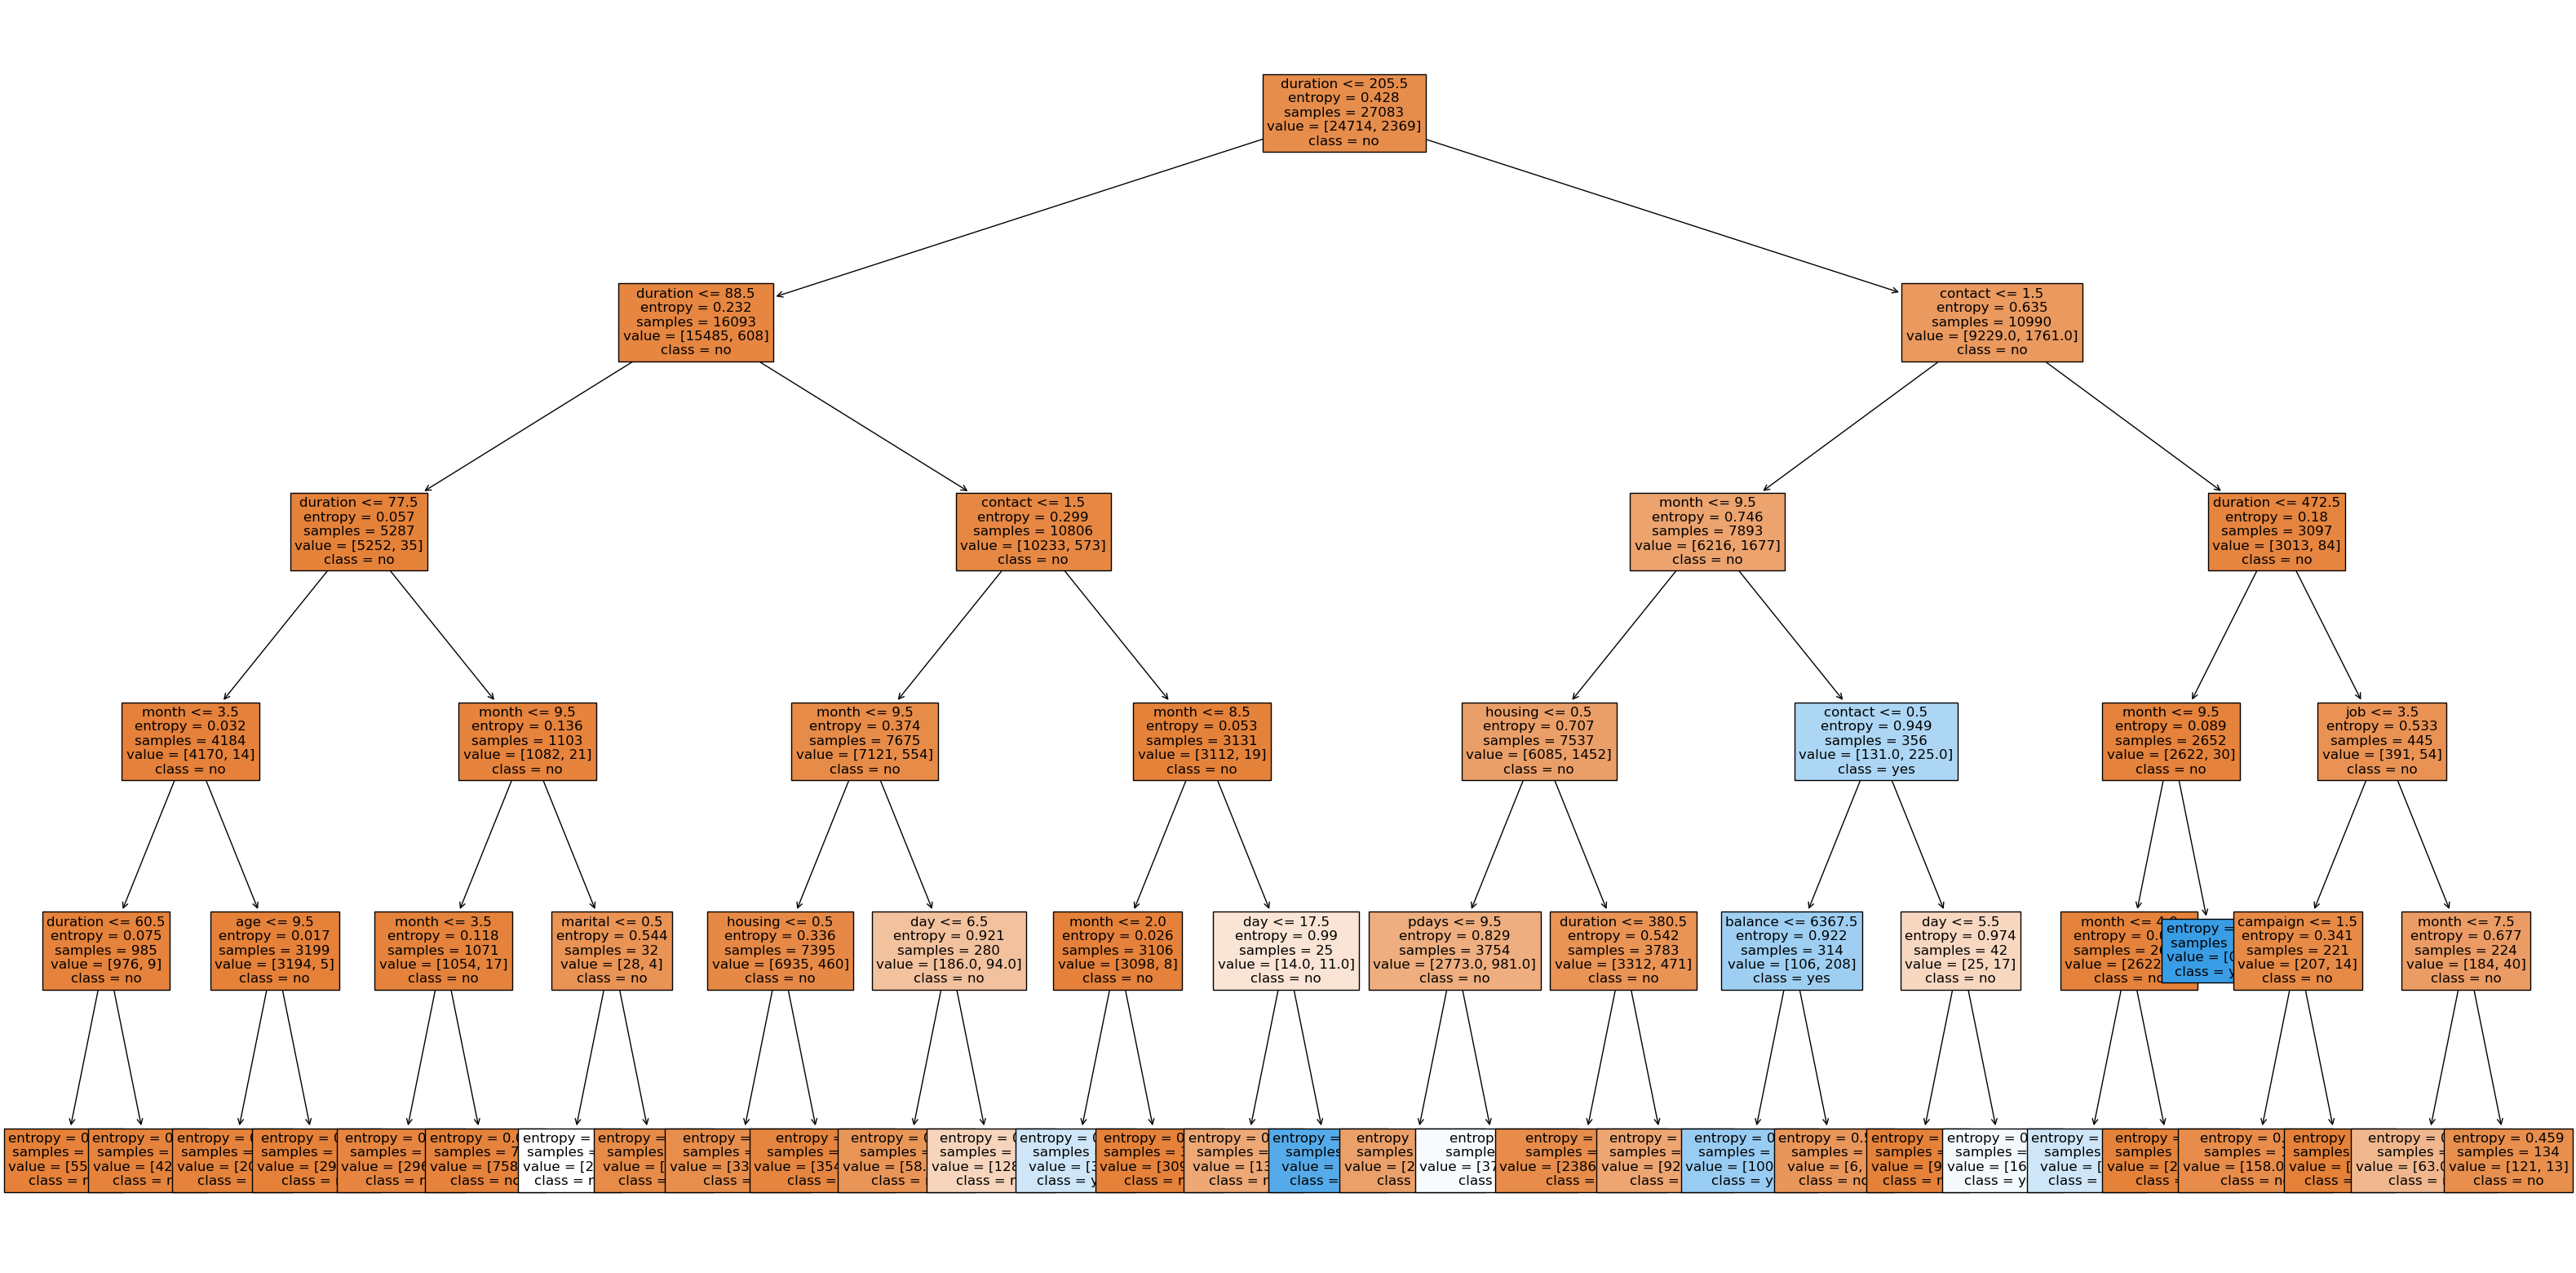

In [168]:
cn=['no','yes']
fn=x_train.columns
plt.figure(figsize=(40,20))
plot_tree(dc1, feature_names=fn.tolist(), class_names=cn, filled=True,fontsize=12)
plt.show()

# Final Conclusion### 
High Accuracy for Both Criteria
 Both the Gini impurity and entropy criteria provide high accuracy for training and testing, with training accuracies around 93.6% and testing accuracies around 93.3% for Gini and 93.2% for entropy.### 

Performance Metrics Comparison:

The Gini criterion has a slightly higher testing accuracy and a better recall for the positive class (1), indicating it is better at identifying true positive instances.
The entropy criterion results in fewer false positives but more false negatives compared to Gini